<a href="https://colab.research.google.com/github/indumisw-png/Electrical-AI-session/blob/main/Aieye_Introduction_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

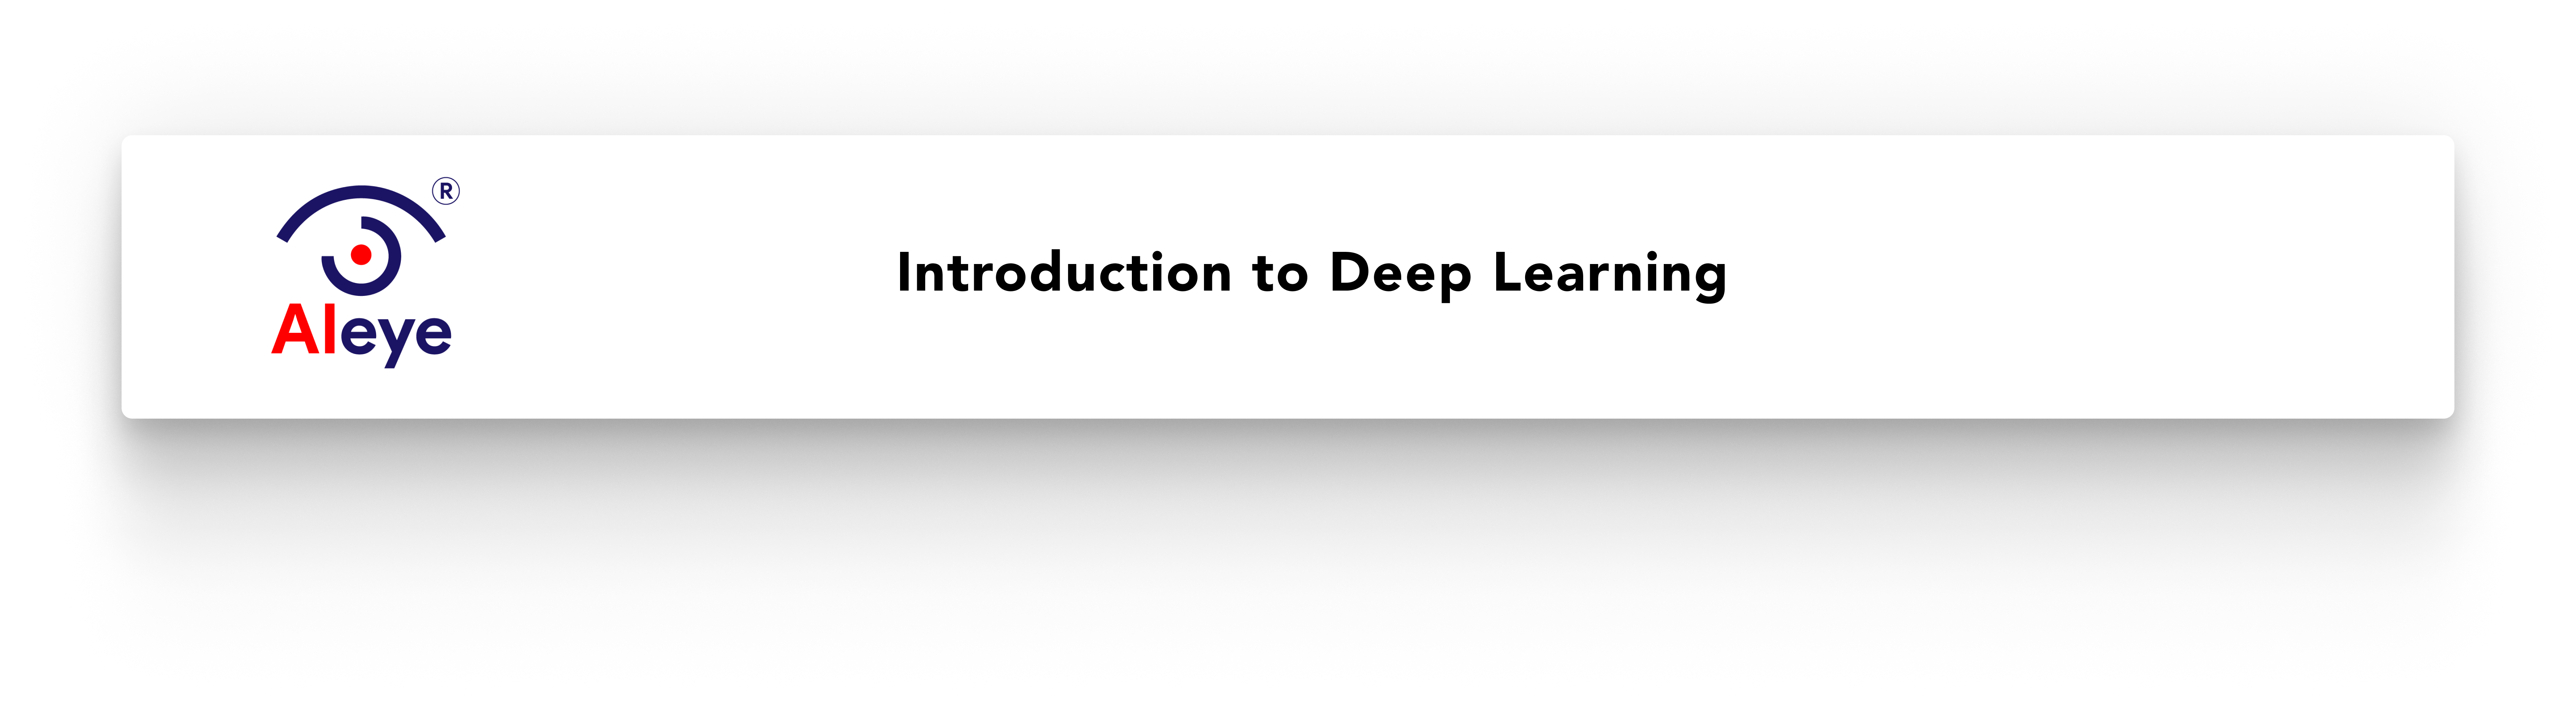

## What is character recognition?
What you see here are handwritten number characters. As you can see, even the human brain may sometimes find it difficult to recognize them.

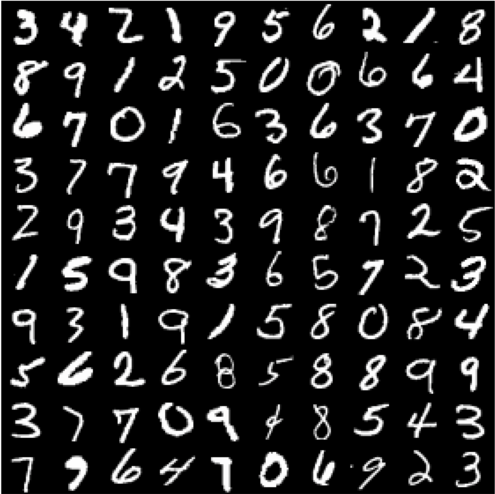

This week, we will understand how to get Artificial Intelligence to recognize handwritten characters.

# Character Recognition and Deep Learning

Character recognition problem can be solved as a classification problem. Today we will be using Deep Learning to achieve character recognition by classifying handwritten number characters with accuracies surpassing 95%. The artificial neural network consists of a basic fully-connected network followed by a deeper network that uses the concepts of convolution and pooling.

We will here construct an artificail neural network and train it using thousands of images of handwritten number characters. A trined neural network will be able to successfully recognized different hand written number character writtent by different persons.

Here, we use Python APIs to construct the neural network. We use the Keras Python API with TensorFlow.

Just like human brain needs to be trained to be able to recognize chacters now we have to train the artificial neural network. The database used for training and testing is the "MNIST database". It contains 60,000 images for training and 10,000 images for testing.

<a href="https://ibb.co/CVJRRQx"><img src="https://i.ibb.co/F8sRRzG/download.png" alt="download" border="0"></a>

## Prerequisite Python Modules
The following code will load the Keras libraries along with the advanced math, plotting and random numbers generator libraries into the Python environment.


In [ ]:
%matplotlib inline

In [ ]:
import numpy as np                   # advanced math library needed for working with arrays, matrices, and other data structures.
import matplotlib.pyplot as plt      # graph plotting routines library for creating visualizations, plotting data, creating charts, and generating images.
import random                        # for generating random numbers, for example it is required to initialize the weights of the neural network.

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
import keras.utils as np_utils                   # NumPy related tools

from IPython.display import Image, HTML

## Loading Training Data

The following code is used to bundle the MNIST dataset within Keras. This way we can analyze the features of the dataset in Python.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

Image('https://i.ibb.co/7CmXmXZ/Training-Data.png')

Now we have loaded the training dataset. Do you want to see some of them?

Lets use matplotlib librarary of Python, to show us some randomly selected  number characters from the training dataset.

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

As you can see the number characters in the dataset are have been labeled as Class 0, Class 1, ..., Class 9.

These number characters are digital images constructed using pixels. An image is a matrix of pixels. In the gray scale, pixel value "0" represents the pure black and "255" represnts the pure white.

Following code randomely selects a character and plots the full pixel matrix of that character. In here the size of the pixel matrix is 28 X 28.

It is this pixel matrix that will be the input to the neural network.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
num = random.randint(0, len(X_train))
matprint(X_train[num])

## Formatting the input data layer

We know that the pixel matrix size is 28 X 28. Further, 28 X 28 = 784 pixels. Therefore, the input data to the neural network has 784 data values. When these values are arranged in a vertical array it is called the input vector.
As a result, the input layer of the neural network should have 784 neurons.

Example:

Consider the following 3 X 3 matrix. It has 9 pixels. The input vector to the neural network is shown on the right.


<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

Following code reshapes the pixel matrix in to the input vector, which is called flattening.

Each input image in the training process is reshaped (or flattened) into an input vector.

We also normalize the inputs to be in the range 0 to 1 rather than 0 to 255.

It is a common practice to normalize the input data this way.

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

As we know, the number characters are labeled as class 0,1,..., 9. Now we redefine the way the classes are represented in the one-hot format as follows.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```
The idea here is simple. We will have 10 neurons in the output layer of the neural network. If the first layer fires, output is the numebr character "0". In other words,

if the output vector is

```
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
```
then the output is number character "0".

if the output vector is

```
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
```
then the output is number character "5".

![neural_network](https://s11.gifyu.com/images/SctjX.gif)

The following code redefines the way the classes are represented in the one-hot format.

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a 3-layer fully connected network (FCN)

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

Here we will use four layer neural network. As we know, the input layer should have 784 neurons and output layer 10 neurons. There are two hidden layers each having 512 neurons. In here we will use Python Keras library to construct the neural network in python.

We use the following Python code to create the four-layer sequential neural network.

A Sequential model is a type of neural network that is made up of a linear stack of layers.  This means that the output of each layer is the input to the next layer.

In [ ]:
model = Sequential()

## The first hidden layer

Following code creates the first hidden layer of the neural network with 512 neurons.

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

Following code defines the activation function. Here we will use the ReLU activation function.


In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

$$f(x) = max (0,x)$$
<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/relu.jpg?raw=1' >


As shown in the above diagram, ReLU is a non-linear function that takes a real number as input. Output is  0  if the input is negative.The output is equal to the input if the input is positive.

For example:
```
Input = - 0.8 then Output = 0.

Input = 0.8  then Output = 0.8

```

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))



## Adding the second hidden layer

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))



## The Final Output Layer

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

Note that the softmax activation function has been used in the neurons, in the output layer. Softmax function is very popular as an activation function for the output neurons of classification network.

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))



Following code generates a table sumerizing the specifications of the neural network that we built.

In [ ]:
# Summarize the built model

model.summary()

## Compiling the Neural Network

Compiling a neural network is the process of transforming the complete python program (neural network mathematical model) we have developed into a form that can be executed efficiently your machine.

How accurately our neural network recognizes the characters, in other words, the accuracy of its output depends on the connecting weights between the neurons of different layers.

In the training process, these weights are adapted to increase the accuracy of the output of the neural network.

Can you remember we wrote the error function in week 1 in our curve fitting example to find the internal resistance of a battery. Error function should be written differently to suite diferent applications. In this application, we use categorical cross-entropy option in python as the error function. Error function is also called the loss function.

adam option in python as the weight adaptation method or the optimizer function.


In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Image('https://i.ibb.co/xfz09bb/Training-Neural-Network.png')

## Training the Neural Network!
This is the fun part!

Batch size refers to the number of training samples that are used to train the neural network in one iteration or epoch. The batch size can affect the training speed, accuracy, and stability of the neural network.

A larger batch size can lead to faster training, as the neural network updates its weights more frequently.

A larger batch size can lead to better accuracy, as the nural network is able to see more data in each iteration. However, a larger batch size can also lead to overfitting, as the neural network learns the training data too well and is not able to generalize to new data.

So a good batch size may take some trial and error to find!

<a href="https://imgbb.com/"><img src="https://i.ibb.co/mCR5dgf/download-copy.png" alt="download-copy" border="0"></a>


Following code trains the Neural Network that we have just created and produces the Error or Loss curve. This curve explains how the error varies with number of training cycles.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.title('Error or Loss')
  plt.xlabel('Number of Iterations')
  plt.ylabel('Error or Loss')
  plt.show()

if __name__ == '__main__':
  history = model.fit(X_train, Y_train,
          batch_size=64, epochs=30,
          verbose=1)
  plot_loss(history)

Image('https://i.ibb.co/D7WDbcr/Training-Model.png')


Just like a human learning something for the first time, as you can see, the artificial neural network may struggle during the initial training cycles.

However, with more training cycles, it learns better.

The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## Testing the Neural Network

Testing a trained neural network is important to make ensure that the trained network is performing well on new data that it has not seen before.

Actually, this is a test of generalization. If the neural network does not generalize well during the training process, it will not be able to make accurate output results on new data.

Following code tests the trained Neural Network and produces the test accuracy and error.

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Visualization of the Output of the Trained Neural Network

Now, let us see how this trained neural network performs.

The follwing code produces the results of 18 tests. In these tests, the neural network is asked to recognize 18 different hand written number characters.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()



In here, Class refers to the number shown or input to the neural network and Predicited is the output of the neural network.

As you can see, the neural network is not always correct.

Are you supperised? Even humans can make mistakes. More training with different batch sizes may help.

Unfortunately, we don't have time to perform large number of training cycles or iterations in the classroom.

So far we used a single neural network with 2 hidden layers.


# Introducing Convolution! What is it?

The neural network we built and tested accepted the pixel values and operated soley on those values. However, a much smarter neural network will recognize the characters based on their features such as **curvatures and edges**, etc., just like a smart human brain would do.

In our deep neural network, we will use a convolution neural network or CNN for feature extraction.

Convolution neural network applies **filters** (kernals) that traverse through each image and generate **feature maps**.

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/convolution.gif?raw=1' >

In the above example, the image is a 5 x 5 matrix and the filter shown in yellow going over is a 3 x 3 matrix.

A dot product operation takes place between the image and the filter and the convolved feature is generated. Please see the diagram.

Each filter in a CNN learns a different characteristic of an image.

Filters are often used in photoediting software to apply blurring, edge detection, sharpening, etc. Some examples are shown below.


<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/kernels.png?raw=1' >

Filters in deep learning networks are used in similar ways, that is to highlight certain features.

Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map.

This keeps only the features of interest, reduces the number of learned parameters, and decreases the computational cost (system memory requirement).

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/max_pooling.png?raw=1' >

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/go_deeper.jpg?raw=1' >

## Building a "Deep" Convolutional Neural Network

The following code will load the Keras libraries into the Python environment to build the CNN.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, BatchNormalization


The following code is used to reload the MNIST dataset. This way we can analyze the features of the dataset in Python.

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Image('https://i.ibb.co/7CmXmXZ/Training-Data.png')

Previousely, we did flatterning to convert the pixel matrix in to an input vector. However, here with the deep networks we don't do flatterning, but instead we input the pixel matrix as it is. Can you explain this?

The answer is, the neural network we built and tested previously accepted the pixel values and operated soley on those values. In deep neural networks the characters are recognized based on their features such as **curvatures and edges**, etc. This means image matrix should be the input as it is.

The following code format the training data for the CNN.

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

The following code redefines the way the classes are represented in the one-hot format, as we did previously.

In [ ]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

The following code creates four convolution layers and two max pooling layers in total for the feature extraction.

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
model.summary()

In [ ]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Image('https://i.ibb.co/xfz09bb/Training-Neural-Network.png')

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit(train_generator, steps_per_epoch=60000//128, epochs=10, verbose=1,
                    validation_data=test_generator, validation_steps=10000//128)
Image('https://i.ibb.co/D7WDbcr/Training-Model.png')

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.save_weights('my-mnist-model.weights.h5')


## Great results!

<a href="https://ibb.co/Tb1hSrY"><img src="https://i.ibb.co/z7FfYNQ/download-1.png" alt="download-1" border="0"></a>

Now Lets Try it with your own Handwriting.

In [ ]:
!pip install -q gradio

In [ ]:
!pip install -U typing-extensions

In [ ]:
!pip install -U gradio


In [ ]:
import tensorflow as tf
import numpy as np
from urllib.request import urlretrieve
import gradio as gr

urlretrieve("https://gr-models.s3-us-west-2.amazonaws.com/mnist-model.h5", "my-mnist-model.h5")
model = tf.keras.models.load_model("my-mnist-model.h5")

def recognize_digit(image):
    image = np.array(image).astype('float32') / 255.0  # normalize the image
    image = np.expand_dims(image, axis=(0, -1))  # add batch and channel dimensions
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

output_component = gr.Label(num_top_classes=3)
input_component = gr.Sketchpad()

gr.Interface(
    fn=recognize_digit,
    inputs=input_component,
    outputs=output_component,
    title="MNIST Sketchpad",
    live=True,
    description="Draw a number 0 through 9 on the sketchpad, and click submit to see the model's predictions. Model trained on the MNIST dataset.",
    thumbnail="https://raw.githubusercontent.com/gradio-app/real-time-mnist/master/thumbnail2.png"
).launch()


In [ ]:
import tensorflow as tf
import numpy as np
from urllib.request import urlretrieve
import gradio as gr

# Download the model
urlretrieve("https://gr-models.s3-us-west-2.amazonaws.com/mnist-model.h5", "my-mnist-model.h5")
model = tf.keras.models.load_model("my-mnist-model.h5")

def recognize_digit(image):
    image = np.array(image).astype('float32') / 255.0  # Normalize the image
    image = np.resize(image, (28, 28, 1))  # Resize to match model input
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

# Create Gradio components
output_component = gr.Label(num_top_classes=3)
input_component = gr.Sketchpad()

# Launch the Gradio interface
gr.Interface(
    fn=recognize_digit,
    inputs=input_component,
    outputs=output_component,
    title="MNIST Sketchpad",
    live=True,
    description="Draw a number 0 through 9 on the sketchpad, and click submit to see the model's predictions. Model trained on the MNIST dataset.",
    thumbnail="https://raw.githubusercontent.com/gradio-app/real-time-mnist/master/thumbnail2.png"
).launch()


In [ ]:
import tensorflow as tf
import numpy as np
from urllib.request import urlretrieve
from PIL import Image

# Download the model
urlretrieve("https://gr-models.s3-us-west-2.amazonaws.com/mnist-model.h5", "my-mnist-model.h5")
model = tf.keras.models.load_model("my-mnist-model.h5")

def preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28
    image = np.array(image).astype('float32') / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=(0, -1))  # Add batch and channel dimensions
    return image

def recognize_digit(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image).tolist()[0]
    return np.argmax(prediction)  # Return the predicted digit

# Example usage
image_path = input("Enter the path to the image: ")
predicted_digit = recognize_digit(image_path)

# Print the prediction
print(f"The predicted digit is: {predicted_digit}")
